In [11]:
import pandas as pd
import json
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Data.csv')
print(type(df.info()))
print(df['Outcome'].value_counts())
df = df.drop(['Id'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
<class 'NoneType'>
Outcome
0    1816
1     952
Name: count, dtype: int64


In [12]:
# df = df.drop_duplicates(ignore_index=True)
# print(df.info())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


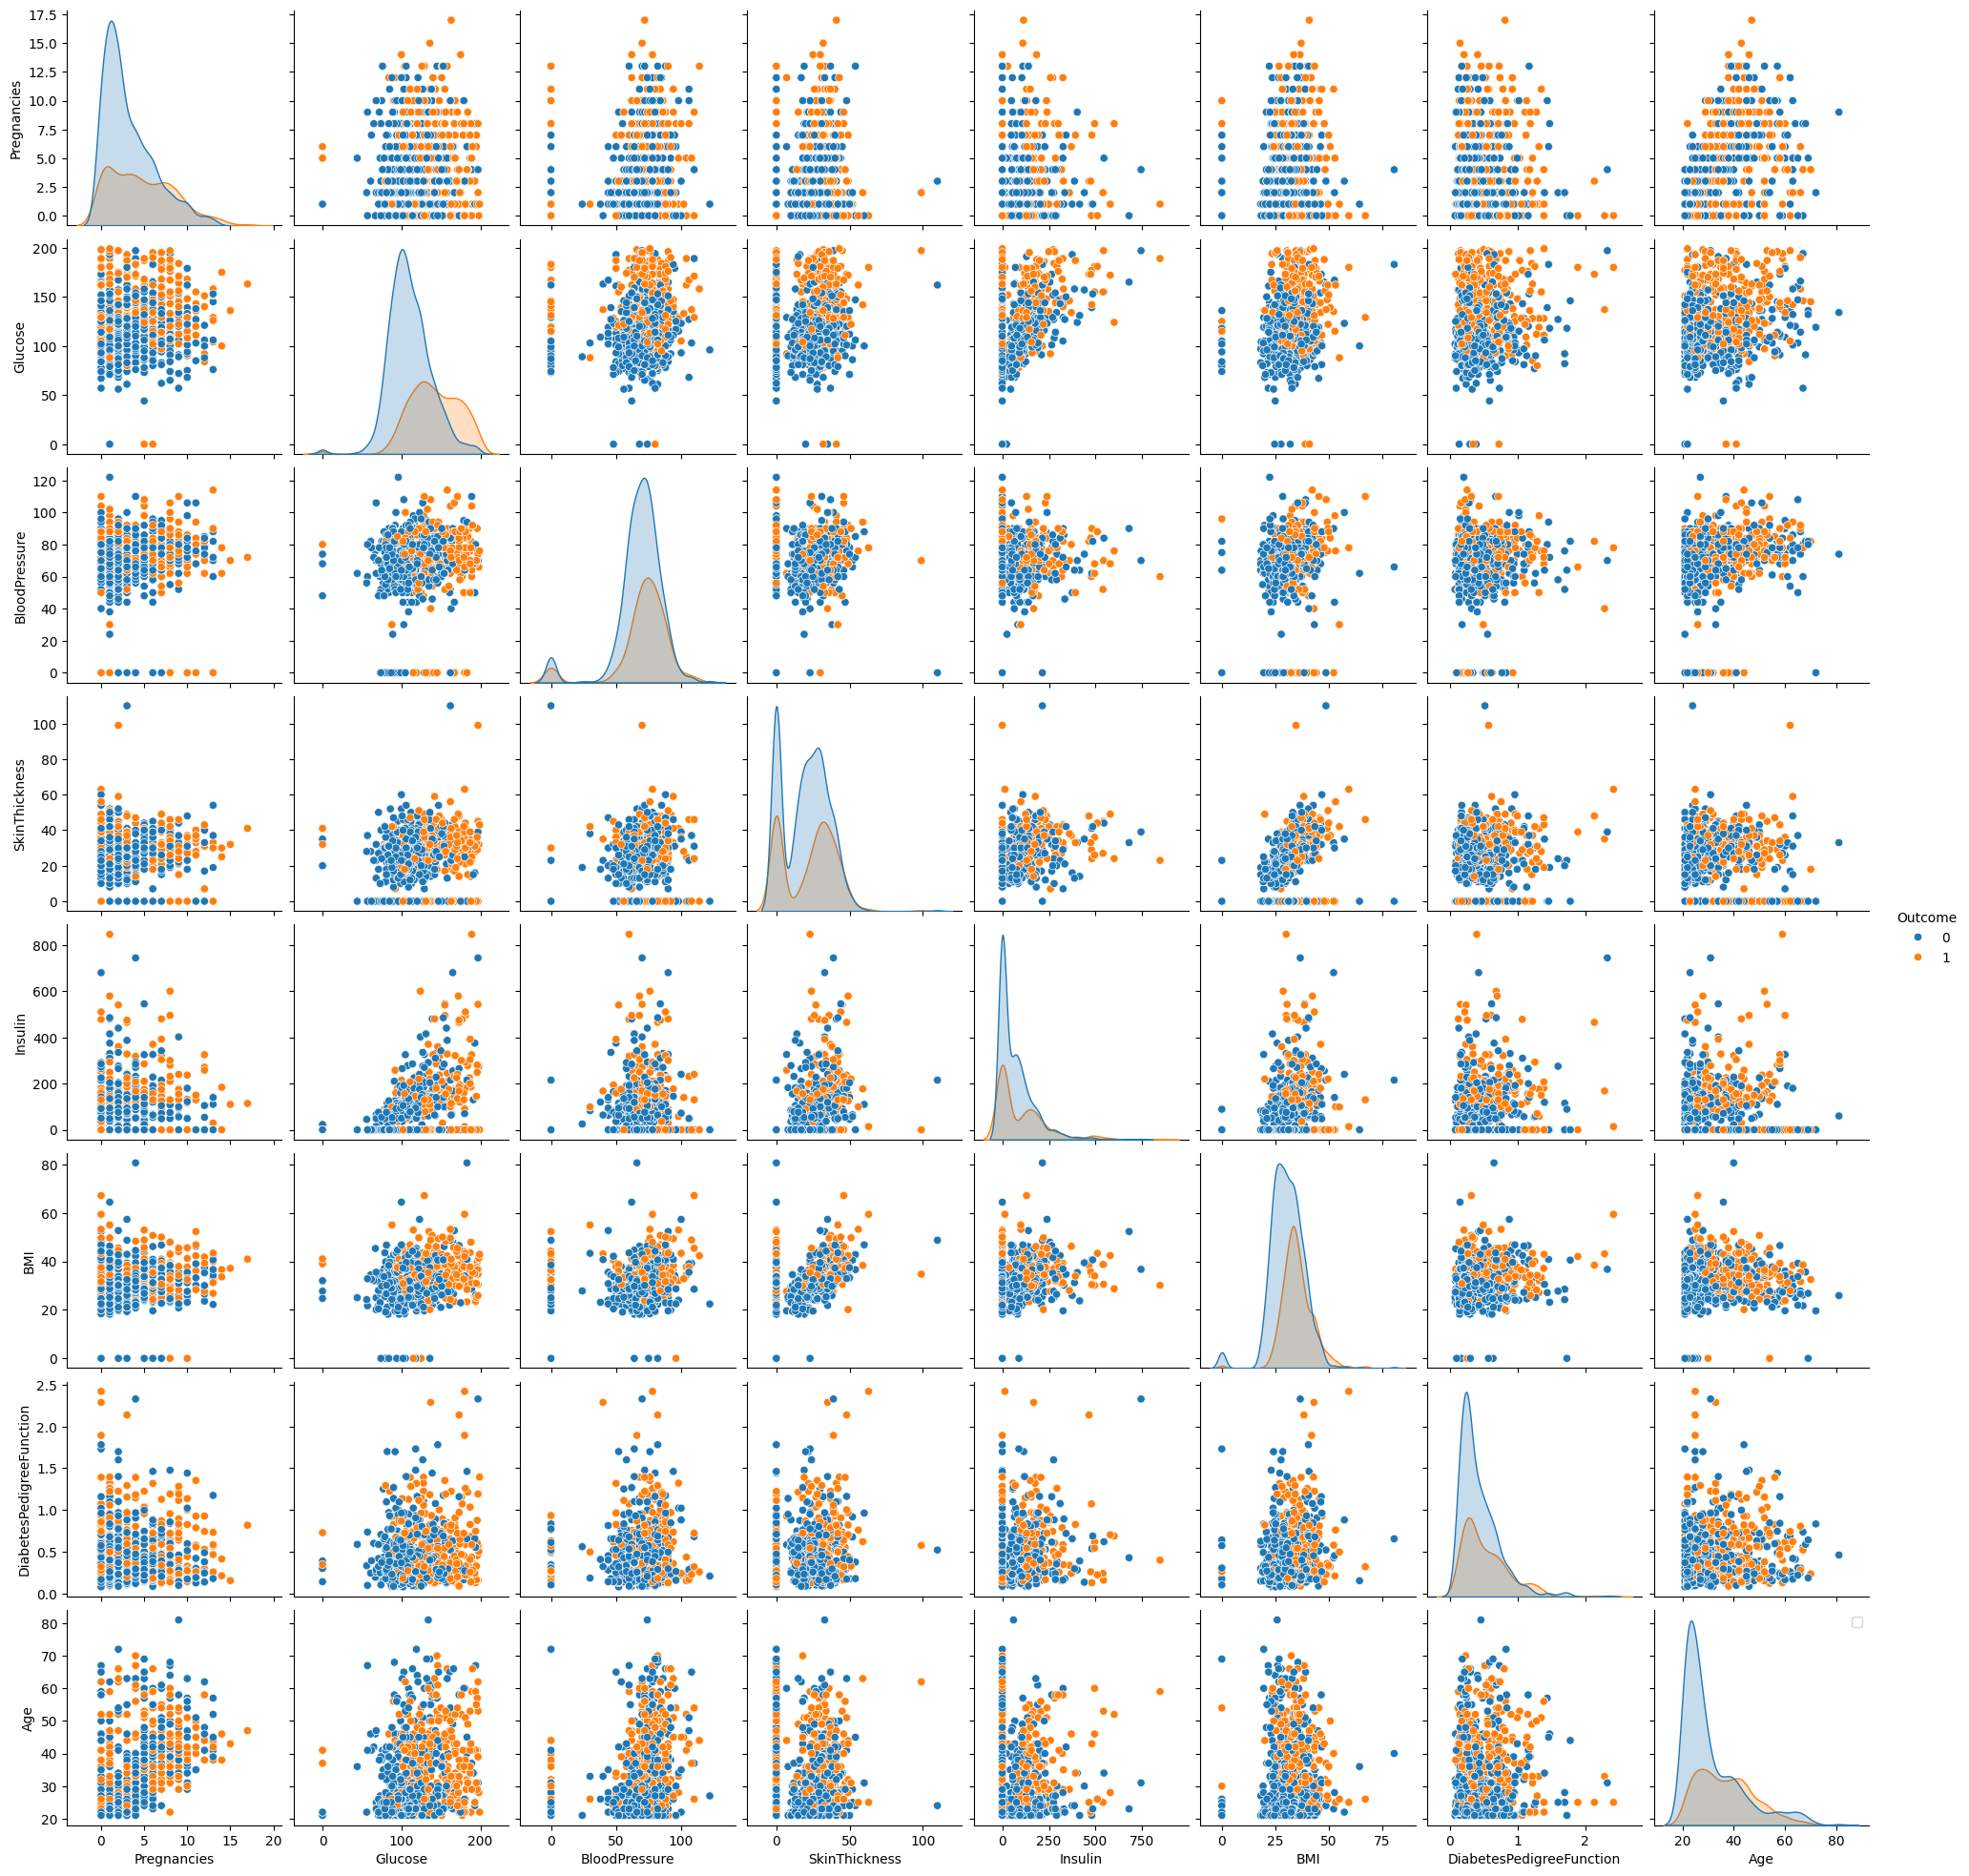

In [13]:
sns.pairplot(df,hue='Outcome')
plt.legend()
plt.show()

In [14]:
prop = pd.read_csv('prop.csv')
scale = {}

for i in range(len(prop)):
    scale[prop.iloc[i][0]] = []
for i in range(len(prop)):
    # print(prop.iloc[i])
    start = 0
    end = 0
    if prop.iloc[i][1] == '*':
        start = 0
    else:
        start = float(prop.iloc[i][1])

    if prop.iloc[i][2] == '*':
        end = 1000000
    else:
        end = float(prop.iloc[i][2])
    scale[prop.iloc[i][0]].append([start,end,prop.iloc[i][3]])

print(scale)

with open("scale.json", "w") as outfile: 
    json.dump(scale, outfile)

{'Pregnancies': [[0.0, 1.0, 'Low'], [2.0, 3.0, 'Medium'], [4.0, 6.0, 'High'], [7.0, 1000000, 'Very_High']], 'Glucose': [[0.0, 99.99, 'Low'], [100.0, 124.99, 'Medium'], [125.0, 1000000, 'High']], 'BloodPressure': [[30.0, 59.99, 'Low'], [60.0, 83.99, 'Medium'], [85.0, 89.99, 'High'], [90.0, 108.99, 'Very_High'], [109.0, 1000000, 'Extremely_High']], 'SkinThickness': [[0, 44.99, 'Low'], [45.0, 60.0, 'Medium'], [60.0, 1000000, 'High']], 'Insulin': [[0.0, 15.99, 'Low'], [16.0, 89.99, 'Medium'], [90.0, 159.99, 'High'], [166.0, 1000000, 'Very_High']], 'BMI': [[0, 18.49, 'UnderWeight'], [18.5, 24.99, 'Normal'], [25.0, 29.99, 'OverWeight'], [30.0, 34.99, 'Obese'], [35.0, 1000000, 'Obese2']], 'DiabetesPedigreeFunction': [[0, 0.49, 'Low'], [0.5, 0.99, 'Medium'], [1.0, 1.8, 'High'], [1.81, 1000000, 'Very_High']], 'Age': [[0, 29.0, 'Low'], [30.0, 44.0, 'Medium'], [45.0, 59.0, 'High'], [60.0, 1000000, 'Very_High']]}


C:\Users\khanhph9\AppData\Local\Temp\ipykernel_17744\2996376015.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale[prop.iloc[i][0]] = []
C:\Users\khanhph9\AppData\Local\Temp\ipykernel_17744\2996376015.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if prop.iloc[i][1] == '*':
C:\Users\khanhph9\AppData\Local\Temp\ipykernel_17744\2996376015.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = float(prop.iloc[i][1])


In [15]:
print(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1    

In [16]:
Label = df['Outcome']
df = df.drop(["Outcome"], axis=1)
FRB = []

for i in range(len(df)):
    rule =[]
    for j in df.columns:
        for k in scale[j]:
            if k[0] <= df.iloc[i][j] <= k[1]:
                rule.append(k[2])
    FRB.append(rule)

print(FRB)

[['High', 'High', 'Medium', 'Low', 'Low', 'Obese', 'Medium', 'High'], ['Low', 'Low', 'Medium', 'Low', 'Low', 'OverWeight', 'Low', 'Medium'], ['Very_High', 'High', 'Medium', 'Low', 'Low', 'Normal', 'Medium', 'Medium'], ['Low', 'Low', 'Medium', 'Low', 'High', 'OverWeight', 'Low', 'Low'], ['Low', 'High', 'Low', 'Low', 'Very_High', 'Obese2', 'Very_High', 'Medium'], ['High', 'Medium', 'Medium', 'Low', 'Low', 'OverWeight', 'Low', 'Medium'], ['Medium', 'Low', 'Low', 'Low', 'Medium', 'Obese', 'Low', 'Low'], ['Very_High', 'Medium', 'Low', 'Low', 'Obese2', 'Low', 'Low'], ['Medium', 'High', 'Medium', 'Medium', 'Very_High', 'Obese', 'Low', 'High'], ['Very_High', 'High', 'Very_High', 'Low', 'Low', 'UnderWeight', 'Low', 'High'], ['High', 'Medium', 'Very_High', 'Low', 'Low', 'Obese2', 'Low', 'Medium'], ['Very_High', 'High', 'Medium', 'Low', 'Low', 'Obese2', 'Medium', 'Medium'], ['Very_High', 'High', 'Medium', 'Low', 'Low', 'OverWeight', 'High', 'High'], ['Low', 'High', 'Medium', 'Low', 'Very_High', '

In [17]:
fdf = pd.DataFrame(FRB).drop(columns=[8])
fdf.columns = df.columns.to_list()

result = pd.concat([fdf,Label],axis=1)
result.to_csv('result.csv',index=False)


In [18]:
result.to_csv('result.csv',index=False)

In [19]:
out = (df)
out.index.name = 'Patient'
out = pd.concat([out,Label],axis=1)
out.to_csv('out.csv')